In [11]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [6]:
# Functions to brightness normalize and correct ASD jumps in data

def brightness_norm(indat, conv_perc = True):
    outdat = indat / np.linalg.norm(indat, axis=0)

    if conv_perc == True:
        outdat = outdat*100
        
    return outdat

def parabolic_corr1(indat):
    
    t1 = (indat.iloc[600]-indat.iloc[599]+indat.iloc[602]-indat.iloc[601])/2
    offset = indat.iloc[601] - indat.iloc[600] - t1

    c1 = (indat.iloc[600]+offset)/indat.iloc[600]
    
    outdat = indat
    outdat.iloc[0:601]=indat.iloc[0:601]*c1

    return outdat

def parabolic_corr2(indat):
    c_spot = 1431
    t1 = (indat.iloc[c_spot]-indat.iloc[c_spot+1]+indat.iloc[c_spot-3]-indat.iloc[c_spot-1])/2
    offset = indat.iloc[c_spot-1] - indat.iloc[c_spot] - t1

    c1 = (indat.iloc[c_spot]+offset)/indat.iloc[c_spot]
    
    outdat = indat
    outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1

    return outdat

# Greenhouse Exp. 1

In [76]:
# Function to read in text files and assign identifying information to data

def import_refl(path):
    files = sorted(glob.glob(path))
    
    wav = np.arange(400, 2451) 
    
    df = pd.DataFrame(columns = np.append(['treeID','river','crosstype','tamarisk','specID'],wav))

    for j,i in enumerate(files):
        f = i.split('/')[2]
        
        river = f[0]
        crosstype = f[1]
        f_end = f[2:]
        
        if (crosstype == 'C') | (crosstype == 'R'):
            crosstype = f[2]
            f_end = f[3:]
        f_tree = f_end.split('000')[0]
        
        try:
            f_tree.split('.')[1]
            tamarisk = f_tree.split('.')[1]
            treeID = f_tree.split('.')[0]
        except:
            tamarisk = 'T'
            treeID = f_tree
            
        if (treeID == '-7(F1)'):
            treeID = '7(F1)'
        if (treeID == '-5(BCN)'):
            treeID = '5(BCN)'

        specID = f_end.split('.asd')[0][-1]
        d = pd.read_csv(i, delimiter = '\t')
        d.columns = ['wavelength','refl']
        d = d.iloc[49:2100]
        
        
        d['refl']=parabolic_corr1(d.iloc[:,1])
        d['refl']=parabolic_corr2(d.refl)

        d['refl'] = brightness_norm(d.refl)
#         d = d.reset_index()
        
        d.index = np.arange(0,len(d))
        d = d.T.drop('wavelength', axis = 0)
        d.columns = wav
    
        if (treeID[0] != 'c') & (treeID[0] != 'b'):

            ndf = pd.DataFrame(data = {"TreeID":[treeID],
                                   "river":[river],
                                       "crosstype":[crosstype],
                                       "tamarisk":[tamarisk],
                                   "specID":[specID]})



            d = pd.concat([ndf.reset_index(drop=True),d.reset_index(drop=True)], axis = 1,ignore_index=True)
            d.columns = np.append(['treeID','river','crosstype','tamarisk','specID'],wav)


            df = pd.concat([df, d])
        else:
            continue
    
    
    return df


data_gh1 = import_refl('data/greenhouse1_reflectance/*') # GH1

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/1438588788.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dty

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [77]:
# Remove erroneous data

data_gh1 = data_gh1[data_gh1['705']<2.5]
data_gh1 = data_gh1[data_gh1['1001']>2.4]
data_gh1 = data_gh1[data_gh1['1450']<1.7]

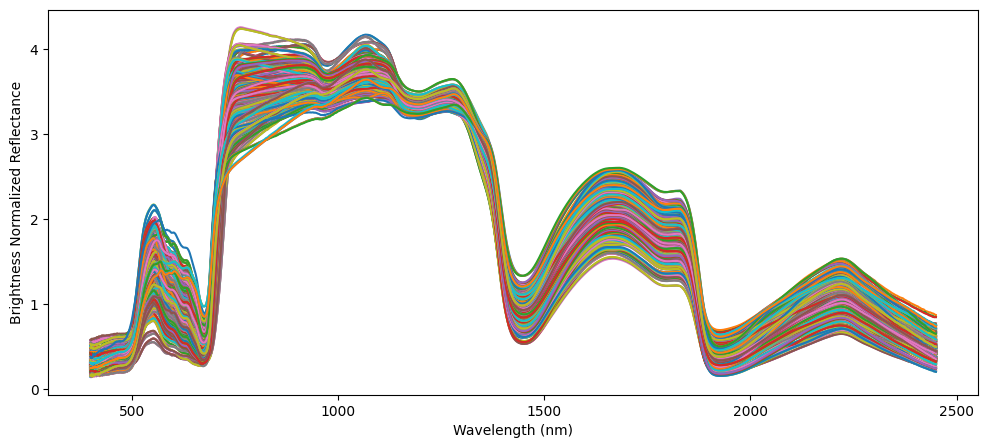

In [78]:
plt.figure(figsize=(12,5));
wav = np.arange(400,2451)

tmp = data_gh1.iloc[:,5:2056].T
plt.plot(wav,tmp, alpha = 1);
    
plt.ylabel("Brightness Normalized Reflectance");
plt.xlabel("Wavelength (nm)");
# plt.vlines(1831, 0, 4)

In [79]:
#Load ancillary data

anc = pd.read_csv('data/Spec trees 12_4.csv')

anc['TreeID']=anc['Tree ID'].str.split(' ', expand = True)[1]
anc['river']=anc.Site.str[0]
anc['crosstype']=anc["Tree ID"].str[1]

data_gh1 = pd.merge(data_gh1, anc, left_on = ['treeID','river','crosstype'],right_on = ['TreeID','river','crosstype'])
data_gh1 = data_gh1.drop(['Date','river','Tree ID','Notes','TreeID','crosstype','specID'], axis = 1)

# Average spectra by plant (data from 3 leaves collected)
data_gh1 = data_gh1.groupby(['treeID','Site','tamarisk', 'Crosstype_MSAT','Treatment']).mean().reset_index()

In [80]:
# Reconfigure drought column
data_gh1['D'] = data_gh1.Treatment.str.split('Drought', expand = True)[0]
data_gh1['Drought'] = np.where(data_gh1.D=='No ', 'W','D')
data_gh1 = data_gh1.drop('D', axis = 1)

In [81]:
# Remove tamarisk samples
data_gh1 = data_gh1[data_gh1.tamarisk !='T']

# Remove bad bands
data_gh1 = data_gh1.drop(np.arange(900,1101).astype('str'), axis =1)

In [82]:
data_gh1['crosstype']= np.where(data_gh1.Crosstype_MSAT == 'Fremont', 'f', 
                             np.where(data_gh1.Crosstype_MSAT == 'Hybrid', 'h', 'n'))

data_gh1 = data_gh1.drop(['Crosstype_MSAT', 'Treatment'], axis = 1)

In [83]:
data_gh1

,treeID,Site,tamarisk,400,401,402,403,404,405,406,...,2443,2444,2445,2446,2447,2448,2449,2450,Drought,crosstype
0,1-10,Blue River,1,0.270414,0.274879,0.280995,0.276874,0.279217,0.280832,0.279848,...,0.418086,0.415085,0.412291,0.409789,0.407255,0.404979,0.403150,0.401061,D,n
1,1-10,Blue River,2,0.255087,0.252070,0.273165,0.269589,0.265637,0.268686,0.274368,...,0.486194,0.482732,0.479503,0.477220,0.474097,0.470448,0.467920,0.464306,D,n
4,1-11,Weber River,1,0.284715,0.281812,0.278882,0.279080,0.282088,0.284199,0.285027,...,0.443796,0.440732,0.438186,0.435133,0.433438,0.432987,0.432114,0.430863,W,f
5,1-11,Weber River,2,0.337650,0.332022,0.329270,0.333064,0.335338,0.337228,0.341282,...,0.494217,0.490885,0.488409,0.486264,0.484389,0.484123,0.481799,0.479442,W,f
7,1-13,Indian Creek,1,0.235044,0.228760,0.227346,0.230531,0.230530,0.230266,0.231851,...,0.576682,0.574980,0.574045,0.575985,0.574260,0.569368,0.566196,0.562077,W,h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,9-14,San Francisco,1,0.319258,0.308527,0.311028,0.335189,0.335409,0.327216,0.323184,...,0.654329,0.651461,0.648060,0.644365,0.640360,0.635601,0.631561,0.628858,D,h
202,9-5,Weber River,1,0.270057,0.251463,0.243230,0.256445,0.262508,0.262040,0.260406,...,0.374840,0.370660,0.368109,0.366119,0.364385,0.363569,0.361455,0.360107,D,h
203,9-5,Weber River,2,0.468149,0.461695,0.461473,0.463303,0.465977,0.466609,0.464213,...,0.631142,0.626978,0.625820,0.625567,0.625056,0.627294,0.628257,0.626629,D,h
205,9-8,Blue River,1,0.297880,0.290489,0.291606,0.300754,0.301672,0.306299,0.312030,...,0.587215,0.583988,0.580894,0.578268,0.575246,0.571612,0.569436,0.567776,D,n


# Greenhouse Exp. 2

In [104]:
# Read in data
data_gh2 = pd.read_csv('data/Greenhouse2_spec.csv')

header_gh2 = data_gh2.iloc[:,:8]
spec_gh2 = data_gh2.iloc[:,58:-50]

# Apply corrections
spec_gh2 = spec_gh2.apply(parabolic_corr1, axis =1)
spec_gh2 = spec_gh2.apply(brightness_norm, axis =1)

data_gh2 = pd.concat([header_gh2, spec_gh2], axis = 1)

# Clean erroneous data
data_gh2 = data_gh2[(data_gh2['400']<0.75) & (data_gh2['550']<2) &(data_gh2['600']<1.6)&(data_gh2['900']>3.2)]

# Average spectra by plant (3 leaves per plant)
data_gh2 = data_gh2.groupby(['Drought', "Soil","Myc","population","crosstype", "genotype","individual"]).mean().reset_index()

# Remove irrelevant data
data_gh2=data_gh2[(data_gh2['crosstype']!='w')&(data_gh2['crosstype']!='v')].drop(['individual','spec_rep'], axis = 1)



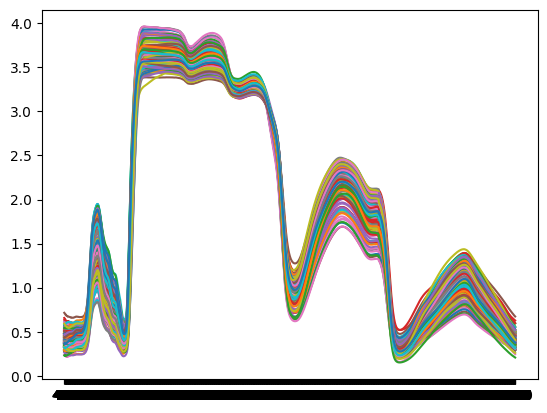

In [105]:
plt.plot(data_gh2.iloc[:,8:].T);

In [106]:
# Remove bad bands
data_gh2 = data_gh2.drop(np.arange(900,1101).astype('str'), axis =1)


# Remove irrelevant data
data_gh2 = data_gh2[data_gh2.Soil == 'N']

In [107]:
data_gh2

,Drought,Soil,Myc,population,crosstype,genotype,400,401,402,403,...,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
47,D,N,A,br,f,2.0,0.506542,0.504194,0.499285,0.499510,...,0.495644,0.492363,0.489066,0.485438,0.481888,0.478428,0.475209,0.472098,0.469229,0.466158
48,D,N,A,br,f,4.0,0.405906,0.404798,0.403737,0.408162,...,0.387993,0.384878,0.382297,0.379994,0.377682,0.375765,0.373816,0.371759,0.370061,0.368130
49,D,N,A,ic,h,8.0,0.361645,0.359086,0.352821,0.354219,...,0.374892,0.372125,0.369290,0.366066,0.363228,0.360723,0.358143,0.355678,0.353138,0.350855
50,D,N,A,ic,n,9.0,0.419292,0.417713,0.414894,0.407827,...,0.375014,0.372394,0.369902,0.367795,0.365478,0.363168,0.360935,0.358765,0.357019,0.354826
51,D,N,A,jc,f,1.0,0.477117,0.480322,0.481589,0.478975,...,0.520810,0.517447,0.514774,0.512219,0.509730,0.508024,0.505569,0.502610,0.499919,0.497127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,W,N,N,jc,h,9.0,0.388170,0.385921,0.382946,0.382925,...,0.421087,0.417688,0.414337,0.410642,0.407369,0.404573,0.401442,0.398231,0.395487,0.392429
229,W,N,N,jc,h,9.0,0.400865,0.397787,0.393804,0.392205,...,0.402462,0.399934,0.397285,0.394556,0.391714,0.388736,0.386093,0.383561,0.381326,0.378673
230,W,N,N,jc,n,13.0,0.337321,0.330566,0.322323,0.324150,...,0.436215,0.432742,0.429288,0.425549,0.421988,0.418654,0.415276,0.412083,0.408755,0.405285
231,W,N,N,lc,h,1.0,0.320844,0.320668,0.319208,0.316736,...,0.335357,0.332478,0.329816,0.327115,0.324544,0.322312,0.320056,0.317803,0.315816,0.313338


# Greenhouse

In [115]:
# Merge datasets

data_gh1['number'] = data_gh1.treeID.str.split('-').str[0]
data_gh2['number']= data_gh2.genotype.astype(int)

data_gh = pd.concat([data_gh1.drop(['treeID','tamarisk'], axis = 1), data_gh2.drop(['Soil', 'Myc','genotype'], axis = 1)], axis = 0)

data_gh['population']= np.where(data_gh.Site == 'Blue River', 'br',
                                    np.where(data_gh.Site == 'Weber River', 'wr', 
                                            np.where(data_gh.Site =='Indian Creek', 'ic',
                                                    np.where(data_gh.Site == 'LCR', 'lc',
                                                            np.where(data_gh.Site =='San Francisco', 'sf',data_gh.population)))))



data_gh = data_gh.drop('Site', axis = 1)
data_gh

,400,401,402,403,404,405,406,407,408,409,...,2445,2446,2447,2448,2449,2450,Drought,crosstype,number,population
0,0.270414,0.274879,0.280995,0.276874,0.279217,0.280832,0.279848,0.282591,0.282874,0.280938,...,0.412291,0.409789,0.407255,0.404979,0.403150,0.401061,D,n,1,br
1,0.255087,0.252070,0.273165,0.269589,0.265637,0.268686,0.274368,0.267594,0.259523,0.256507,...,0.479503,0.477220,0.474097,0.470448,0.467920,0.464306,D,n,1,br
4,0.284715,0.281812,0.278882,0.279080,0.282088,0.284199,0.285027,0.288109,0.292733,0.294781,...,0.438186,0.435133,0.433438,0.432987,0.432114,0.430863,W,f,1,wr
5,0.337650,0.332022,0.329270,0.333064,0.335338,0.337228,0.341282,0.350300,0.346871,0.343962,...,0.488409,0.486264,0.484389,0.484123,0.481799,0.479442,W,f,1,wr
7,0.235044,0.228760,0.227346,0.230531,0.230530,0.230266,0.231851,0.235200,0.241285,0.245837,...,0.574045,0.575985,0.574260,0.569368,0.566196,0.562077,W,h,1,ic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.388170,0.385921,0.382946,0.382925,0.379663,0.375392,0.373631,0.378062,0.374875,0.371745,...,0.407369,0.404573,0.401442,0.398231,0.395487,0.392429,W,h,9,jc
229,0.400865,0.397787,0.393804,0.392205,0.391603,0.389364,0.387174,0.391229,0.391504,0.390472,...,0.391714,0.388736,0.386093,0.383561,0.381326,0.378673,W,h,9,jc
230,0.337321,0.330566,0.322323,0.324150,0.322733,0.317154,0.311932,0.315656,0.313918,0.309858,...,0.421988,0.418654,0.415276,0.412083,0.408755,0.405285,W,n,13,jc
231,0.320844,0.320668,0.319208,0.316736,0.316483,0.315355,0.313701,0.316113,0.316718,0.316992,...,0.324544,0.322312,0.320056,0.317803,0.315816,0.313338,W,h,1,lc


In [112]:
# Load in genetic data
geno = pd.read_csv('data/hybrid_structure.csv')

In [117]:
data_gh.population = data_gh.population.str.upper()
data_gh.crosstype = data_gh.crosstype.str.upper()
data_gh.number = data_gh.number.astype(str)

geno['population']=geno['pop']
geno.number = geno.number.astype(str)

In [118]:
# Merge in genetic ancillary data
data_gh = pd.merge(data_gh, 
                   geno, 
                   how = 'left', 
                   left_on = ['number', 'population', 'crosstype'], 
                   right_on = ['number', 'population', 'Original XT'])



In [120]:
# Get crosstype based on genetics
data_gh = data_gh[~np.isnan(data_gh.PercentF)]
data_gh['crosstype_geno'] = np.where(data_gh.PercentF>0.9, 'F', 
         np.where(data_gh.PercentF<0.1, 'N', 'H'))

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/84110406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gh['crosstype_geno'] = np.where(data_gh.PercentF>0.9, 'F',


In [137]:
all_columns = np.arange(400, 2451).astype(str).tolist()
exclude_columns = np.arange(900, 1101).astype(str).tolist()
columns_to_select = ['Drought', 'crosstype_geno'] + [col for col in all_columns if col not in exclude_columns]

data_gh = data_gh[columns_to_select]

In [138]:
data_gh

,Drought,crosstype_geno,400,401,402,403,404,405,406,407,...,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,D,N,0.270414,0.274879,0.280995,0.276874,0.279217,0.280832,0.279848,0.282591,...,0.424950,0.421375,0.418086,0.415085,0.412291,0.409789,0.407255,0.404979,0.403150,0.401061
1,D,N,0.255087,0.252070,0.273165,0.269589,0.265637,0.268686,0.274368,0.267594,...,0.493143,0.489524,0.486194,0.482732,0.479503,0.477220,0.474097,0.470448,0.467920,0.464306
4,W,H,0.235044,0.228760,0.227346,0.230531,0.230530,0.230266,0.231851,0.235200,...,0.579418,0.577979,0.576682,0.574980,0.574045,0.575985,0.574260,0.569368,0.566196,0.562077
5,W,H,0.221202,0.221096,0.223485,0.228752,0.229383,0.229613,0.231585,0.233765,...,0.454399,0.451735,0.449614,0.446912,0.444893,0.443907,0.442634,0.441933,0.439726,0.436190
6,W,N,0.266032,0.256787,0.248065,0.252888,0.254981,0.252070,0.249098,0.256773,...,0.437705,0.436024,0.433999,0.432730,0.430500,0.427391,0.424293,0.420266,0.417538,0.415857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,W,N,0.437712,0.435360,0.434074,0.436982,0.437893,0.436342,0.435399,0.440974,...,0.484682,0.481304,0.477896,0.474046,0.470733,0.468024,0.465098,0.462288,0.459547,0.456248
228,W,N,0.388170,0.385921,0.382946,0.382925,0.379663,0.375392,0.373631,0.378062,...,0.421087,0.417688,0.414337,0.410642,0.407369,0.404573,0.401442,0.398231,0.395487,0.392429
229,W,N,0.400865,0.397787,0.393804,0.392205,0.391603,0.389364,0.387174,0.391229,...,0.402462,0.399934,0.397285,0.394556,0.391714,0.388736,0.386093,0.383561,0.381326,0.378673
231,W,H,0.320844,0.320668,0.319208,0.316736,0.316483,0.315355,0.313701,0.316113,...,0.335357,0.332478,0.329816,0.327115,0.324544,0.322312,0.320056,0.317803,0.315816,0.313338


In [139]:
data_gh.to_csv('data/crosstype_dataset.csv')

# P. fremontii Dataset

In [145]:
# Function to import P. fremontii dataset

def import_refl(month):
    path = f'data/*{month}*/*.txt'
    files = glob.glob(path)
    
    wav = np.arange(400, 2451)    
    df = pd.DataFrame(columns = np.append(['TreeID','leafID','specID'],wav))

    for j,i in enumerate(files):
        f = i.split('/')[2].split('.')[0]
        treeID = f.split('_')[0]
        end = f.split('_')[-1]
        leafID = end[0]
        specID = end[-1]
        
        d = pd.read_csv(i, delimiter = '\t')
        d.columns = ['wavelength','refl']
        d = d.iloc[49:2100]
        
        d['refl']=parabolic_corr1(d.iloc[:,1])
        d['refl']=parabolic_corr2(d.refl)

        d['refl'] = brightness_norm(d.refl)
        
        d.index = np.arange(0,len(d))
        d = d.T.drop('wavelength', axis = 0)
        d.columns = wav
        if (treeID[0] != 'c') & (treeID[0] != 'b'):

            ndf = pd.DataFrame(data = {"TreeID":[treeID],
                                   "leafID":[leafID],
                                   "specID":[specID]})



            d = pd.concat([ndf.reset_index(drop=True),d.reset_index(drop=True)], axis = 1,ignore_index=True)
            d.columns = np.append(['TreeID','leafID','specID'],wav)


            df = pd.concat([df, d])
        else:
            continue
    
    
    return df


In [146]:
sept = import_refl('Sept')
july = import_refl('July')

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/1647528318.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dty

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[0:601]=indat.iloc[0:601]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdat.iloc[c_spot:]=indat.iloc[c_spot:]*c1
/var/folders/c4/y9lltpqx1m54b1qsfgyy2b8w0000gq/T/ipykernel_31993/662541234.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [148]:
# Read in ancillary data

anc = pd.read_csv('data/all_tcrit_drydown2023.csv', delimiter = ',')
anc = anc.drop(['well'], axis = 1).groupby(['pot', 'date','time', 'population','pop.geno', 'treatment','treatment.levels']).mean().reset_index()
anc['mo_no']=anc.date.str.split('/',expand = True)[0]
anc['month']=np.where(anc.mo_no == '7', 'july', np.where(anc.mo_no == '9', 'sept', 'aug'))
anc

,pot,date,time,population,pop.geno,treatment,treatment.levels,sample,leaf,elevation,rep,meas.week,tmax,t50,tcrit,tcrit_se,max.tleaf,tsm,mo_no,month
0,1,7/18/23,8:00,NRV-NEW,NRV101,predrought,predrought,1.20,2.0,666.0,4.0,1.0,52.826667,50.383333,48.950000,0.083333,44.92,4.030000,7,july
1,1,8/29/23,11:30,NRV-NEW,NRV101,drought,drought.3,1.20,2.0,666.0,4.0,5.0,59.736667,53.163333,50.600000,0.150000,49.36,1.240000,8,aug
2,1,9/22/23,12:40,NRV-NEW,NRV101,postdrought,postdrought,1.20,2.0,666.0,4.0,7.0,53.346667,49.490000,47.270000,0.086667,38.99,8.280000,9,sept
3,2,7/17/23,14:00,NRV-NEW,NRV101,predrought,predrought,2.20,2.0,666.0,11.0,1.0,52.510000,49.966667,48.753333,0.063333,44.92,3.833333,7,july
4,2,8/29/23,9:45,NRV-NEW,NRV101,drought,drought.3,2.20,2.0,666.0,11.0,5.0,53.260000,50.243333,48.300000,0.120000,49.36,-1.060000,8,aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,85,8/28/23,18:00,CCR-COL,CCR5,drought,drought.3,85.10,1.0,72.0,3.0,5.0,52.320000,49.780000,46.960000,0.150000,49.31,-2.350000,8,aug
179,85,9/22/23,14:55,CCR-COL,CCR5,postdrought,postdrought,85.15,1.5,72.0,3.0,7.0,53.065000,49.845000,48.580000,0.040000,38.23,10.350000,9,sept
180,90,7/17/23,14:00,JLA-JAK,JLA153,predrought,predrought,90.20,2.0,1521.0,6.0,1.0,53.190000,50.903333,47.920000,0.160000,46.33,1.590000,7,july
181,90,8/29/23,13:00,JLA-JAK,JLA153,drought,drought.3,90.20,2.0,1521.0,6.0,5.0,54.233333,51.900000,50.036667,0.090000,49.06,0.976667,8,aug


In [149]:
# Average all spectra by plant (3 leaves)
sept = sept.drop(['leafID', 'specID'], axis = 1).groupby(['TreeID']).mean().reset_index()
july = july.drop(['leafID', 'specID'], axis = 1).groupby(['TreeID']).mean().reset_index()



In [154]:
# Concatenate data
sept['month']='sept'
july['month']='july'

data_pf = pd.concat([sept, july])
data_pf.TreeID = data_pf.TreeID.astype('int')

# Merge with ancillary data
data_pf = pd.merge(anc.iloc[:,np.array([0,3,4,9,13,14,17,19])].drop_duplicates(),
                   data_pf,  
                   right_on=['TreeID'], 
                   left_on=['pot'], 
                   how = 'right')
data_pf = data_pf[~ data_pf.pot.isna()]
data_pf['pop_code'] = data_pf.population.str.split('-', expand = True)[0]



In [155]:
data_pf

,pot,population,pop.geno,elevation,t50,tcrit,tsm,month_x,TreeID,400,...,2443,2444,2445,2446,2447,2448,2449,2450,month_y,pop_code
0,1.0,NRV-NEW,NRV101,666.0,50.383333,48.950000,4.030000,july,1,0.326756,...,0.696088,0.694543,0.692919,0.692083,0.690692,0.688716,0.687900,0.686677,sept,NRV
1,1.0,NRV-NEW,NRV101,666.0,53.163333,50.600000,1.240000,aug,1,0.326756,...,0.696088,0.694543,0.692919,0.692083,0.690692,0.688716,0.687900,0.686677,sept,NRV
2,1.0,NRV-NEW,NRV101,666.0,49.490000,47.270000,8.280000,sept,1,0.326756,...,0.696088,0.694543,0.692919,0.692083,0.690692,0.688716,0.687900,0.686677,sept,NRV
3,10.0,NRV-NEW,NRV118,666.0,50.380000,48.923333,4.003333,july,10,0.318848,...,0.854881,0.854415,0.854140,0.853479,0.853741,0.855180,0.856234,0.856783,sept,NRV
4,10.0,NRV-NEW,NRV118,666.0,52.330000,50.813333,1.453333,aug,10,0.318848,...,0.854881,0.854415,0.854140,0.853479,0.853741,0.855180,0.856234,0.856783,sept,NRV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,9.0,NRV-NEW,NRV105,666.0,50.465000,48.060000,-1.300000,aug,9,0.331616,...,0.546845,0.545495,0.544111,0.542871,0.541413,0.539799,0.538068,0.536587,july,NRV
328,9.0,NRV-NEW,NRV105,666.0,49.590000,47.883333,8.893333,sept,9,0.331616,...,0.546845,0.545495,0.544111,0.542871,0.541413,0.539799,0.538068,0.536587,july,NRV
329,90.0,JLA-JAK,JLA153,1521.0,50.903333,47.920000,1.590000,july,90,0.230804,...,0.502244,0.500511,0.499184,0.498288,0.496907,0.495494,0.494002,0.492486,july,JLA
330,90.0,JLA-JAK,JLA153,1521.0,51.900000,50.036667,0.976667,aug,90,0.230804,...,0.502244,0.500511,0.499184,0.498288,0.496907,0.495494,0.494002,0.492486,july,JLA


In [157]:
data_pf.to_csv('data/P_fremontii_dataset.csv')